In [35]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

In [31]:
nasa_fireballs = pd.read_csv("data/cneos_fireball_data.csv")
ufo_raw = pd.read_csv("data/ufo_scrubbed.csv")
nasa_fireballs.head()

C:\Users\hfatt\anaconda3\envs\Pythondata\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-01-22 17:11:43,3.5N,76.2W,61.0,NaN,NaN,NaN,NaN,2.000000e+10,0.073
1,2023-01-18 06:57:18,33.1N,173.7W,38.0,14.2,7.8,-5.6,-10.5,2.200000e+10,0.079
2,2023-01-11 23:59:50,31.5N,18.6E,33.5,17.5,-16.1,4.5,-5.2,4.600000e+10,0.150
3,2023-01-09 01:17:14,45.7S,135.0E,27.0,16.7,2.3,-0.4,16.5,9.000000e+10,0.280
4,2023-01-02 16:38:02,1.5N,129.0E,44.6,NaN,NaN,NaN,NaN,5.000000e+10,0.160


In [32]:
nasa_fireballs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peak Brightness Date/Time (UT)       944 non-null    object 
 1   Latitude (deg.)                      754 non-null    object 
 2   Longitude (deg.)                     754 non-null    object 
 3   Altitude (km)                        486 non-null    float64
 4   Velocity (km/s)                      284 non-null    float64
 5   vx                                   284 non-null    float64
 6   vy                                   284 non-null    float64
 7   vz                                   284 non-null    float64
 8   Total Radiated Energy (J)            944 non-null    float64
 9   Calculated Total Impact Energy (kt)  944 non-null    float64
dtypes: float64(7), object(3)
memory usage: 73.9+ KB


In [10]:
nasa_fireballs['Peak Brightness Date/Time (UT)'].astype('datetime64[ns]')

0     2023-01-22 17:11:43
1     2023-01-18 06:57:18
2     2023-01-11 23:59:50
3     2023-01-09 01:17:14
4     2023-01-02 16:38:02
              ...        
939   1993-11-29 17:48:41
940   1993-10-31 03:39:27
941   1991-10-04 09:22:47
942   1990-10-01 03:51:47
943   1988-04-15 03:03:10
Name: Peak Brightness Date/Time (UT), Length: 944, dtype: datetime64[ns]

In [11]:
nasa_fireballs['Peak Brightness Date/Time (UT)'] = nasa_fireballs['Peak Brightness Date/Time (UT)'].astype('datetime64[ns]')

In [7]:
ufo_raw.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6528,-97.477778


In [19]:
ufo_raw.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [22]:
ufo_raw["datetime"].head(300)

0      10/10/1949 20:30
1      10/10/1949 21:00
2      10/10/1955 17:00
3      10/10/1956 21:00
4      10/10/1960 20:00
             ...       
295    10/11/1996 22:00
296    10/11/1997 22:00
297    10/11/1998 02:15
298    10/11/1998 14:05
299    10/11/1998 14:30
Name: datetime, Length: 300, dtype: object

In [26]:

#df_test = pd.DataFrame(pd.to_datetime(ufo_raw["datetime"], format="%m/%d/%Y %H:%M", errors='coerce'))

In [28]:
ufo_raw["datetime"] = pd.to_datetime(ufo_raw["datetime"], format="%m/%d/%Y %H:%M", errors='coerce')

In [29]:
ufo_raw[ufo_raw["datetime"].isna()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
388,NaT,rome,ny,us,oval,120,a min or two,I was walking from the garage to the house&#44...,2/1/2007,43.2127778,-75.456111
693,NaT,chulucanas-piura la vieja (peru),NaN,NaN,other,6312000,2 years,go to: http://www.24horas.com.pe/data/videos/...,3/4/2003,-5.129547,-80.120569
962,NaT,novi,mi,us,triangle,300,5 minutes,V shaped and 8 big and very brite lights&#44mo...,10/30/2012,42.4805556,-83.475556
1067,NaT,salatiga (indonesia),NaN,NaN,disk,22,22 seconds,UFO in Salatiga&#44Indonesia,10/31/2003,-7.33683,110.498817
1221,NaT,cincinnati,oh,us,fireball,300,3-5 minutes,A bright orange light split into four&#44 did ...,10/14/2013,39.1619444,-84.456944
...,...,...,...,...,...,...,...,...,...,...,...
79136,NaT,boonville,nc,us,cigar,10800,3+ hours,Unusual activity in our small community&#44 cr...,9/9/2013,36.2325,-80.708333
79137,NaT,redondo beach,ca,us,triangle,300,5 minutes,Triangulat UFO seen over Redondo Beach&#44 Cal...,12/16/2005,33.8492,-118.387500
79740,NaT,portsmouth,oh,us,changing,900,15 minutes,A bright red light hoovering in the sky.,9/13/2002,38.7317,-82.997778
79759,NaT,montrose,co,us,unknown,1200,20 minutes,Stationary object with three pulsating lights ...,9/9/2004,38.4783,-107.875556


In [36]:
us_census = pd.read_csv("data/US_census.csv")
us_census.head()

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,State,1910,"2,138,093",16.9,42.2,25.0,10.0,1.0,"213,809"
1,Alaska,State,1910,"64,356",1.2,0.1,52.0,NaN,NaN,NaN
2,Arizona,State,1910,"204,354",66.2,1.8,49.0,NaN,NaN,NaN
3,Arkansas,State,1910,"1,574,449",20.0,30.3,30.0,7.0,0.0,"224,921"
4,California,State,1910,"2,377,549",60.1,15.3,38.0,11.0,3.0,"216,051"


In [58]:
us_census = us_census[us_census["Year"] >= 1950]
us_census.head()

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
228,Alabama,State,1950,"3,061,743",8.1,60.5,24.0,9.0,0.0,"340,194"
229,Alaska,State,1950,"128,643",77.4,0.2,52.0,NaN,NaN,NaN
230,Arizona,State,1950,"749,587",50.1,6.6,47.0,2.0,0.0,"374,794"
231,Arkansas,State,1950,"1,909,511",-2.0,36.7,34.0,6.0,-1.0,"318,252"
232,California,State,1950,"10,586,223",53.3,68,22.0,30.0,7.0,"352,874"


ValueError: Unrecognized character 7 in format string

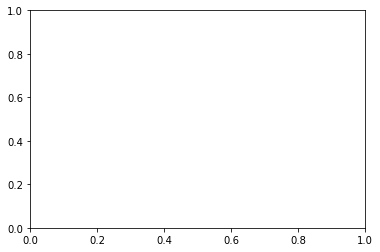

In [62]:
ufo_raw = pd.read_csv("ufosightingdata.csv", delimiter = ",")
ufo_dropped = ufo_raw.dropna()

#datetime
ufo_us = ufo_dropped[ufo_dropped["country"] == "us"]
ufo_by_year = ufo_us
ufo_by_year["datetime"] = pd.to_datetime(ufo_by_year["datetime"], format="%m/%d/%Y %H:%M", errors='coerce')
ufo_by_year[ufo_by_year["datetime"].isna()].dropna()
ufo_by_year["year"] = pd.DatetimeIndex(ufo_by_year['datetime']).year
ufo_by_year.head()

#grouping by decade
groupnames1 = ["Pre-1950s","1950s","1960s","1970s","1980s","1990s","2000s","2010s","2020s"]
bins = [0, 1949.0, 1959.0, 1969.0, 1979.0,1989.0,1999.0,2009.0,2019,2024.0]
ufo_by_year["decade"] = pd.cut(ufo_by_year["year"],bins,labels=groupnames,include_lowest=False)

In [ ]:
Arizona = plt.plot(us_census['Year'], danger_drop_speeds, color="red", label="Arizona")


In [64]:
us_census.groupby(["Name"]).loc["Arizona"]

AttributeError: 'DataFrameGroupBy' object has no attribute 'loc'